# Stroke Prediction

The goal of this project is to determine which features of an individual’s health data are highly predictive of whether the individual would get a stroke or not.

In [1]:
# import custom class and function
from project import DataPreparation, make_histogram

# Data Preparation (Part 1)

We'll be working with the Stroke Prediction dataset from Kaggle, which contains information on patients who had or didn't have a stroke.

## Import Dataset

First, we imported the dataset. We used a `try-except` block to check if it's a csv file.

In [2]:
import pandas as pd

In [3]:
try:
    df = pd.read_csv("healthcare-dataset-stroke-data.csv") # read csv file, save it as a dataframe
except csv.Error as error:
    print("Not a csv file") # if not a csv file, print error message

We created an instance `healthcare` of the class `DataPreparation` to look at the data.

In [4]:
# create an instance of the custom class
healthcare = DataPreparation(df)
healthcare.df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Clean Data

To prep our data for exploratory analysis, we called `__clean_df__()` from `DataPreparation` to convert all the qualitative features to binary values.

We converted "work_type" to `is_employed`, "Residence_type" to `is_Rural`, and "smoking_status" to `has_smoked`. We dropped `id`, "Other" from `gender`, and all the NaN values.

In [5]:
# clean the data by calling the 1st class function
healthcare.clean_df()
healthcare.df.head()

,gender,age,hypertension,heart_disease,ever_married,is_employed,is_Rural,avg_glucose_level,bmi,has_smoked,stroke
0,1,67.0,0,1,1,1.0,0,228.69,36.6,1.0,1
1,1,80.0,0,1,1,1.0,1,105.92,32.5,0.0,1
2,0,49.0,0,0,1,1.0,0,171.23,34.4,1.0,1
3,0,79.0,1,0,1,1.0,1,174.12,24.0,0.0,1
4,1,81.0,0,0,1,1.0,0,186.21,29.0,1.0,1


# Data Visualization

Before determining which features are the most relevant to predicting stroke, we made some hypotheses based on the simple graphic comparison between features and their according stroke cases.

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

## Histograms

The histograms show the quantitative features (`age`, `avg_glucose_level`, `bmi`) and the number of stroke and non-stroke cases.

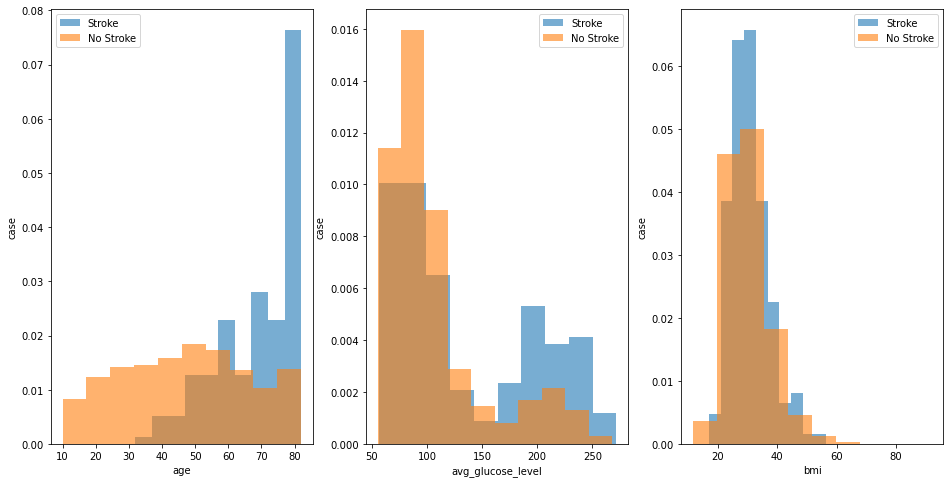

In [7]:
# call make_histogram() function
f = ["age", "avg_glucose_level", "bmi"]
make_histogram(healthcare.df, f)

1. The histograms of age and stroke and non-stroke cases show that there is a significant trend of people with higher age getting more stroke.
2. The second histograms of average glucose level and its stroke and non-stroke cases show that there is a mild trend of people who had stroke having higher average glucose level.
3. The third histograms of bmi and its stroke and non-stroke cases didn't show much significance between the feature and number of the cases.

### Exception Handling

If there are more or less than 3 features, raise `ValueError`, since the histograms are supposed to represent 3 specific features.*

In [8]:
# f = ["age", "bmi"]
# make_histogram(healthcare.df, f)

If the features aren't quantitative, raise `TypeError`. The function will try to detect values over 2, and if there is no value over 2, it will print an error message explaining that the list contains qualitative features.*

In [9]:
# f = ["age", "bmi", "gender"]
# make_histogram(healthcare.df, f)

*uncomment to test exception handling

## Bargraphs

The bar graphs show the qualitative features (`gender`, `hypertension`, `heart_disease`, `ever_married`, `is_employed`, `is_Rural`, `has_smoked`). The left column shows stroke cases while the right column shows non-stroke cases.

In [10]:
# filter the data by stroke vs non-stroke cases
stroke_true = healthcare.df["stroke"] == 1
stroke_false = healthcare.df["stroke"] == 0

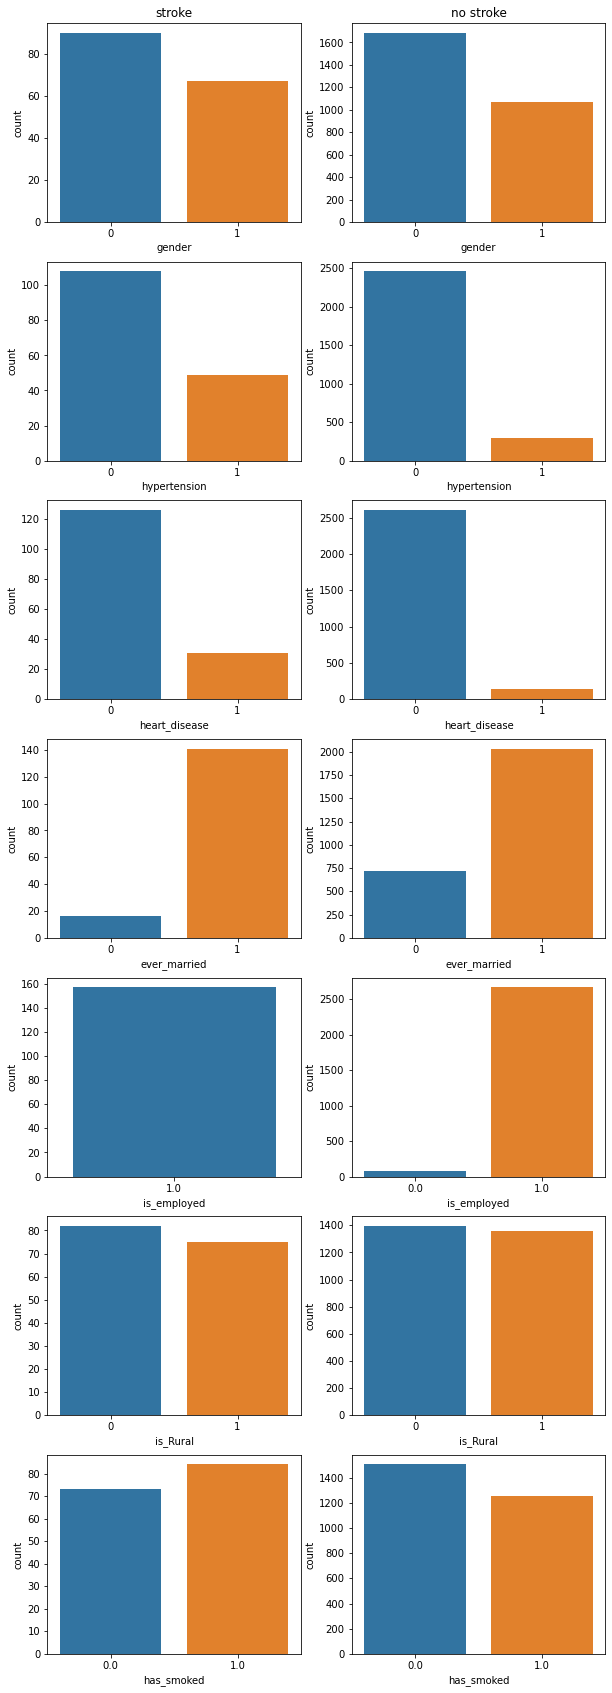

In [11]:
# create bar graphs
fig, axes = plt.subplots(7, 2, figsize = (10, 30))

sns.countplot(ax=axes[0,0], data=healthcare.df[stroke_true], x='gender').set(title='stroke') # left column
sns.countplot(ax=axes[0,1], data=healthcare.df[stroke_false], x='gender').set(title='no stroke') # right column
sns.countplot(ax=axes[1,0], data=healthcare.df[stroke_true], x='hypertension')
sns.countplot(ax=axes[1,1], data=healthcare.df[stroke_false], x='hypertension')
sns.countplot(ax=axes[2,0], data=healthcare.df[stroke_true], x='heart_disease')
sns.countplot(ax=axes[2,1], data=healthcare.df[stroke_false], x='heart_disease')
sns.countplot(ax=axes[3,0], data=healthcare.df[stroke_true], x='ever_married')
sns.countplot(ax=axes[3,1], data=healthcare.df[stroke_false], x='ever_married')
sns.countplot(ax=axes[4,0], data=healthcare.df[stroke_true], x='is_employed')
sns.countplot(ax=axes[4,1], data=healthcare.df[stroke_false], x='is_employed')
sns.countplot(ax=axes[5,0], data=healthcare.df[stroke_true], x='is_Rural')
sns.countplot(ax=axes[5,1], data=healthcare.df[stroke_false], x='is_Rural')
sns.countplot(ax=axes[6,0], data=healthcare.df[stroke_true], x='has_smoked')
sns.countplot(ax=axes[6,1], data=healthcare.df[stroke_false], x='has_smoked')

plt.show()

Based on the results, we hypothesize that the features most relevant to predicting stroke are `is_employed`, `hypertension`, and `has_smoked`. 

We were surprised to learn that for patients who had a stroke, **all** of them were employed. It's important to note, though, that most of the patients from the dataset are employed. Additionally, `has_smoked` doesn't seem to matter as much as we thought. But we can conclude that there are more patients who smoke compared to those who don't for stroke cases, and vice versa for non-stroke cases.

# Data Preparation (Part 2)

To prep our data for machine learning, we called `__clean_df_2__()` from `DataPreparation` to convert all the quantitative variables to binary values. 

We converted "age" to `is_Old`, "avg_glucose_level" to `has_high_glucose`, and "bmi" to `is_Overweight`.

In [12]:
# call 2nd class function
healthcare.clean_df_2()
healthcare.df.head()

,gender,has_high_glucose,is_Overweight,is_Old,hypertension,heart_disease,ever_married,is_employed,is_Rural,has_smoked,stroke
0,1,1,1,1,0,1,1,1.0,0,1.0,1
1,1,0,1,1,0,1,1,1.0,1,0.0,1
2,0,1,1,0,0,0,1,1.0,0,1.0,1
3,0,1,0,1,1,0,1,1.0,1,0.0,1
4,1,1,0,1,0,0,1,1.0,0,1.0,1


# Comparing Models

We wanted to train two models and compare which of the two is better for predicting stroke.

To prep for that, we called `__train_test_split__()` from `DataPreparation` to split our data into train and test sets. That way, we can see how well each model performs on unseen data.

In [13]:
# call 3rd class function
X, y, X_train, X_test, y_train, y_test = healthcare.train_test_split()

## Model 1

We fitted a Logistic Regression model on the training data and tested the model's performance on the testing data.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [15]:
# train logistic regression model
m = LogisticRegression(solver="liblinear")
m.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Next, we computed the classification error for the training and test data to gauge the performance of the logistic regression model.

In [16]:
train_score = m.score(X_train, y_train)
test_score = m.score(X_test, y_test)
print("train score: ", train_score)
print("test score: ", test_score)

train score:  0.9450297755382501
test score:  0.9491758241758241


The train and test score are both high and close to 1, so our model is pretty good. However, these scores may not be accurate as they are dependent on the train-test split (random process). To account for the randomness, let's do a 3-fold cross-validation.

In [17]:
# calculate 3-fold cross validation score
cv_score = cross_val_score(m, X_train, y_train, cv=3).mean()
print(cv_score)

0.9445712471847272


The 3-fold cross validation score is pretty high (nearly the same as the test score for one test-train split calculated previously) so we can conclude logistic regression is a good model.

## Model 2

But is there a better model? Let's train a Decision Tree Classifier model and compute cross-validation scores for max depth of 1-30. This will help us determine the depth that will give us the best Decision Tree Classifier model.

In [18]:
from sklearn import tree
import numpy as np

In [19]:
def fit_tree(X, y, d):
    '''
    Args:
        X: training data
        y: testing data
        d: depth
    Returns:
        T: instance of decisiontree classifier
    '''
    T = tree.DecisionTreeClassifier(max_depth=d) # create an instance of decisiontree classifier
    T.fit(X, y) # train the decisiontree classifier model
    return T

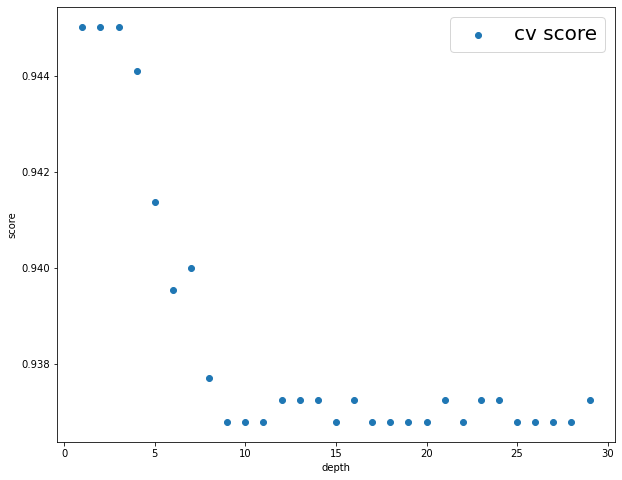

best depth: 1
highest CV score: 0.9450297524575378


In [20]:
# train data with decisiontree classifier
fig, ax = plt.subplots(1, figsize= (10, 8))
depths = range(1, 30)
cv_scores = []

T = tree.DecisionTreeClassifier(max_depth = 3)

for d in depths:
    T = fit_tree(X_train, y_train, d)
    cv_score = cross_val_score(T, X_train, y_train, cv=3).mean() # compute 3-fold cv score
    
    cv_scores.append(cv_score)

ax.scatter(depths, cv_scores, label='cv score')
ax.set(xlabel="depth", ylabel= 'score')
plt.legend(fontsize=20)
plt.show()

min_arg = np.argmax(cv_scores)

print("best depth:", depths[min_arg])
print("highest CV score:", cv_scores[min_arg])

Logistic Regression and Decision Tree Classifier (of any depth 1-5) are both good models for our dataset. The cross validation scores for Decision Tree Classifier were nearly the same for all depths (from 1-30). However, models with depths 1-5 perform slightly better than those with higher depths. Although Logistic Regression and Decision Tree Classifier are equally good models (both have a cross validation score of about 0.95), we will use the Logistic Regression model to examine which features are most correlated with getting a stroke.

# Logistic Regression

Let's determine which features are the most relevant for predicting stroke using Logistic Regression.

## Correlation Coefficients

We stored the names of all the features in a list called `column_names`, which we'll iterate through for our graph. We also calculated the correlation coefficients between each feature and `stroke`.

In [21]:
# calculate correlation coefficients
m.coef_

array([[-0.1381952 ,  0.57212493,  0.04586187,  1.52580252,  0.72144722,
         0.75120424,  0.29361342, -0.88959666, -0.0943752 , -0.07299463]])

In [22]:
# create a list of all the features
column_names = list(X.columns.values)
column_names

['gender',
 'has_high_glucose',
 'is_Overweight',
 'is_Old',
 'hypertension',
 'heart_disease',
 'ever_married',
 'is_employed',
 'is_Rural',
 'has_smoked']

We created a graph that displays all the features and their corresponding correlation coefficients.

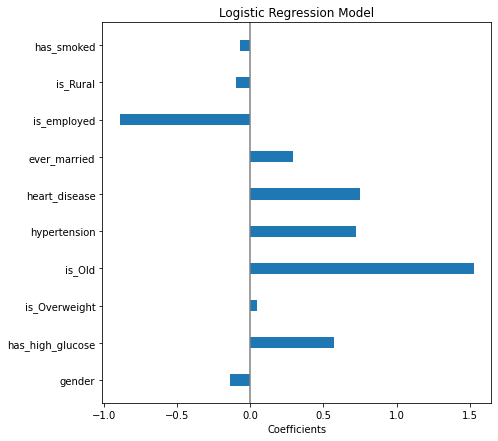

In [23]:
plt.figure(figsize=(9,7))
plt.barh(column_names, m.coef_[0][:], 0.3) # plot features and coefficients
plt.title("Logistic Regression Model")
plt.xlabel("Coefficients")
plt.axvline(x=0, color='gray') # create line at 0 for x-axis
plt.subplots_adjust(left=0.3) # adjust left edge of the plot

plt.show()

The logistic regression coefficient **β** changes in log odds. This means that increasing the feature by 1 unit multiplies the chances of the outcome's occurence by **eβ**, otherwise known as the odds ratio. (https://quantifyinghealth.com/interpret-logistic-regression-coefficients/)

To understand this better, we calculated the odds ratio of every coefficient.

## Odds Ratio

Since we're working with medical data, let's interpret the coefficients as odds ratios to associate features to stroke risk. The odds ratio is the ratio of the probabilities of two mutually exclusive outcomes. For example, the odds of smoking group getting a stroke vs the odds of non-smoking group getting a stroke.

In [24]:
import math

In [25]:
# create an empty list
odds_ratio_L = []

# compute odds ratio for each feature
for i in m.coef_[0]:
    odds_ratio = math.e**i
    odds_ratio_L.append(odds_ratio) # add to list

# save as numpy array
odds_ratio_L = np.array(odds_ratio_L)
print("odds ratio: ", odds_ratio_L)

odds ratio:  [0.87092867 1.77202848 1.04692979 4.59883275 2.05740857 2.11955093
 1.34126529 0.41082142 0.90994129 0.92960582]


An odds ratio bigger than 1.5 indicates a moderately strong positive correlation. An odds ratio close to 1 means the feature has nearly no association with stroke outcome. And an odds ratio smaller than 0.5 (and positive) indicates a moderately strong negative association.

In [26]:
# create a dataframe
data = {'feature': column_names,
        'correlation coefficient': m.coef_[0], 
        'odds ratio': odds_ratio_L
       }
 
df = pd.DataFrame(data)
df

,feature,correlation coefficient,odds ratio
0,gender,-0.138195,0.870929
1,has_high_glucose,0.572125,1.772028
2,is_Overweight,0.045862,1.046930
3,is_Old,1.525803,4.598833
4,hypertension,0.721447,2.057409
5,heart_disease,0.751204,2.119551
6,ever_married,0.293613,1.341265
7,is_employed,-0.889597,0.410821
8,is_Rural,-0.094375,0.909941
9,has_smoked,-0.072995,0.929606


From our table, `has_high_glucose`, `is_Old`, `hypertension` and `heart_disease` have a strong positive correlation with stroke risk as their odds ratio are all larger than 1.5. The largest odds ratio of the four is `is_Old` (3.8): individuals that are old are 3.8 times more likely to have a stroke than those who are not old. Therefore, this feature is the most positively correlated with stroke risk. For the other features, individuals that have heart disease are 2.06 times more likely to get a stroke than those who do not have heart disease OR 2.01 times more likely to get a stroke if one has hypertension than those who do not have hypertension, etc.

Additionally, `is_employed` has a strong negative correlation with stroke risk. It has an odds ratio of 0.40-0.43: individuals that have a stroke are more likely to be not employed than employed. Or individuals that have stroke are 60% less likely to be employed. This also aligns with the correlation coefficient being less than -0.15.